In [1]:
import networkx as nx
import random as rd
import scipy as sp
import numpy as np
opts = {"with_labels": True, "node_color":'g'}


#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
#ESTA FUNCION NO SE USA
'''
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes
     

'''
#Funcion para conectar los nodos
def connect_nodes(G,n,k,p):
    nodes_senders = []
    nodes_receivers = []
    while len(nodes_receivers)< (round(n*k*p)-1):
        for node in G:
            if rd.random() < p:
                for connection in range(1,k+1):
                    receiver_node = rd.randint(0,n-1)
                    if receiver_node != node and not G.has_edge(receiver_node, node):
                        G.remove_edge(node, ((node+connection)%n))
                        G.add_edge(node,receiver_node)
                        nodes_senders.append(node)
                        nodes_receivers.append(receiver_node)                           
    print("Los nodos que envian la conexion son", nodes_senders)
    print("Los nodos que reciben la conexion son", nodes_receivers)               
    return G,nodes_senders,nodes_receivers
    

#Funcion para obtener los vecinos de los nodos
def get_neighbors(G, node):
    neighbors = []
    #for node in nodes:
    for node_G in G:
            if G.has_edge(node,node_G):
                neighbors.append(node_G)
    return neighbors


#Inicia una red conectando cada nodo a sus 2k vecinos
def create_regular_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones de largo alcance a recablear son:",round(n*k*p))
    return G


def new_conn_S(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_senders)):
        neighbors = get_neighbors(G, nodes_receivers[i])
        G.add_edge(nodes_senders[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


def new_conn_R(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_receivers)):
        neighbors = get_neighbors(G, nodes_senders[i])
        G.add_edge(nodes_receivers[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


#Matriz de acoplamiento
def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 






El numero de conexiones de largo alcance a recablear son: 20
Los nodos que envian la conexion son [1, 1, 7, 7, 9, 9, 15, 15, 19, 19, 21, 26, 26, 27, 27, 31, 32, 32, 35, 35]
Los nodos que reciben la conexion son [31, 46, 24, 29, 4, 38, 49, 0, 40, 42, 19, 40, 39, 30, 24, 47, 3, 9, 20, 7]
[[-7.  1.  1. ...  1.  1.  1.]
 [ 1. -7.  0. ...  1.  0.  1.]
 [ 1.  0. -5. ...  0.  0.  0.]
 ...
 [ 1.  1.  0. ... -9.  1.  1.]
 [ 1.  0.  0. ...  1. -4.  1.]
 [ 1.  1.  0. ...  1.  1. -6.]]
El coeficiente de agrupamiento es: 0.45109523809523805
El promedio del camino mas corto es: 3.0253061224489795


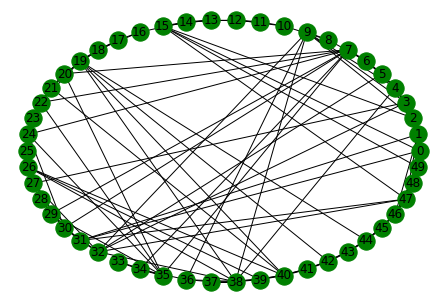

In [37]:
n,k,p  = 50,2,0.2
G = create_regular_network(n,k,p)
G,nodes_senders,nodes_receivers = connect_nodes(G, n,k,p)
if len(nodes_receivers) != round(n*k*p):
    raise Exception("No se generaron las nkp conexiones requeridas, considere simular nuevamente")
G = new_conn_S(G,nodes_senders,nodes_receivers)
G = new_conn_R(G,nodes_senders,nodes_receivers)
ma = matriz_acoplaminento(G)
print(ma)

print("El coeficiente de agrupamiento es:",nx.algorithms.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))
nx.draw_circular(G,**opts)